# Chapter 1:
______________________________________

In [1]:
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt

pil_im = Image.open('Images\\second.jpg')

> This is a lazy operation; this function identifies the file, but the file remains open and the actual image data is not read from the file until you try to process the data (or call the `PIL.Image.Image.load` method)

In [2]:
pil_im = pil_im.convert(mode = 'L') 
# "L" for GrayScale, "RGB" and "CMYK."
# L = R * 299/1000 + G * 587/1000 + B * 114/1000

In [3]:
import os
os.path.splitext('Images\\second.jpg') # split the extension from a path name

('Images\\second', '.jpg')

In [4]:
pil_im = Image.open('Images\\second.jpg')

pil_im_jpeg = os.path.splitext('Images\\second.jpg')[0]+'.jpeg'

try:
    pil_im.save(pil_im_jpeg) # it saves the image in the same path
except: 
    print('cannot convert')
    

> The above implemented `convert()` and `save()` methods.

In [5]:
pil_im.size 

(1800, 1121)

In [6]:
pil_im.thumbnail((500,500)) # this alters the original image

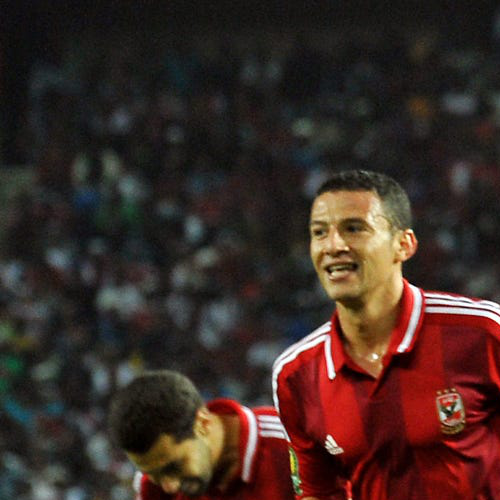

In [7]:
pil_im = Image.open('Images\\second.jpg')
pil_im.crop(box = (0,0,500,500))
# The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate

In [8]:
import copy

box = pil_im.crop((0,0,400,400))
box.transpose(Image.Transpose.ROTATE_90)
pil_im_2 = copy.deepcopy(pil_im)

In [9]:
pil_im_2.paste( box.transpose(Image.Transpose.ROTATE_180),
                (500,500,900,900)
              )

# the pasted_box should match the cropped_box size here the two are:
#    0  ,0  ,400,400
#    500,500,900,900


pil_im_2.show()

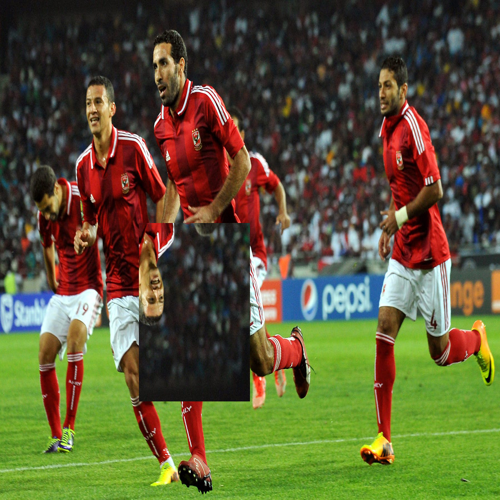

In [10]:
pil_im_2.resize((500,500)) 

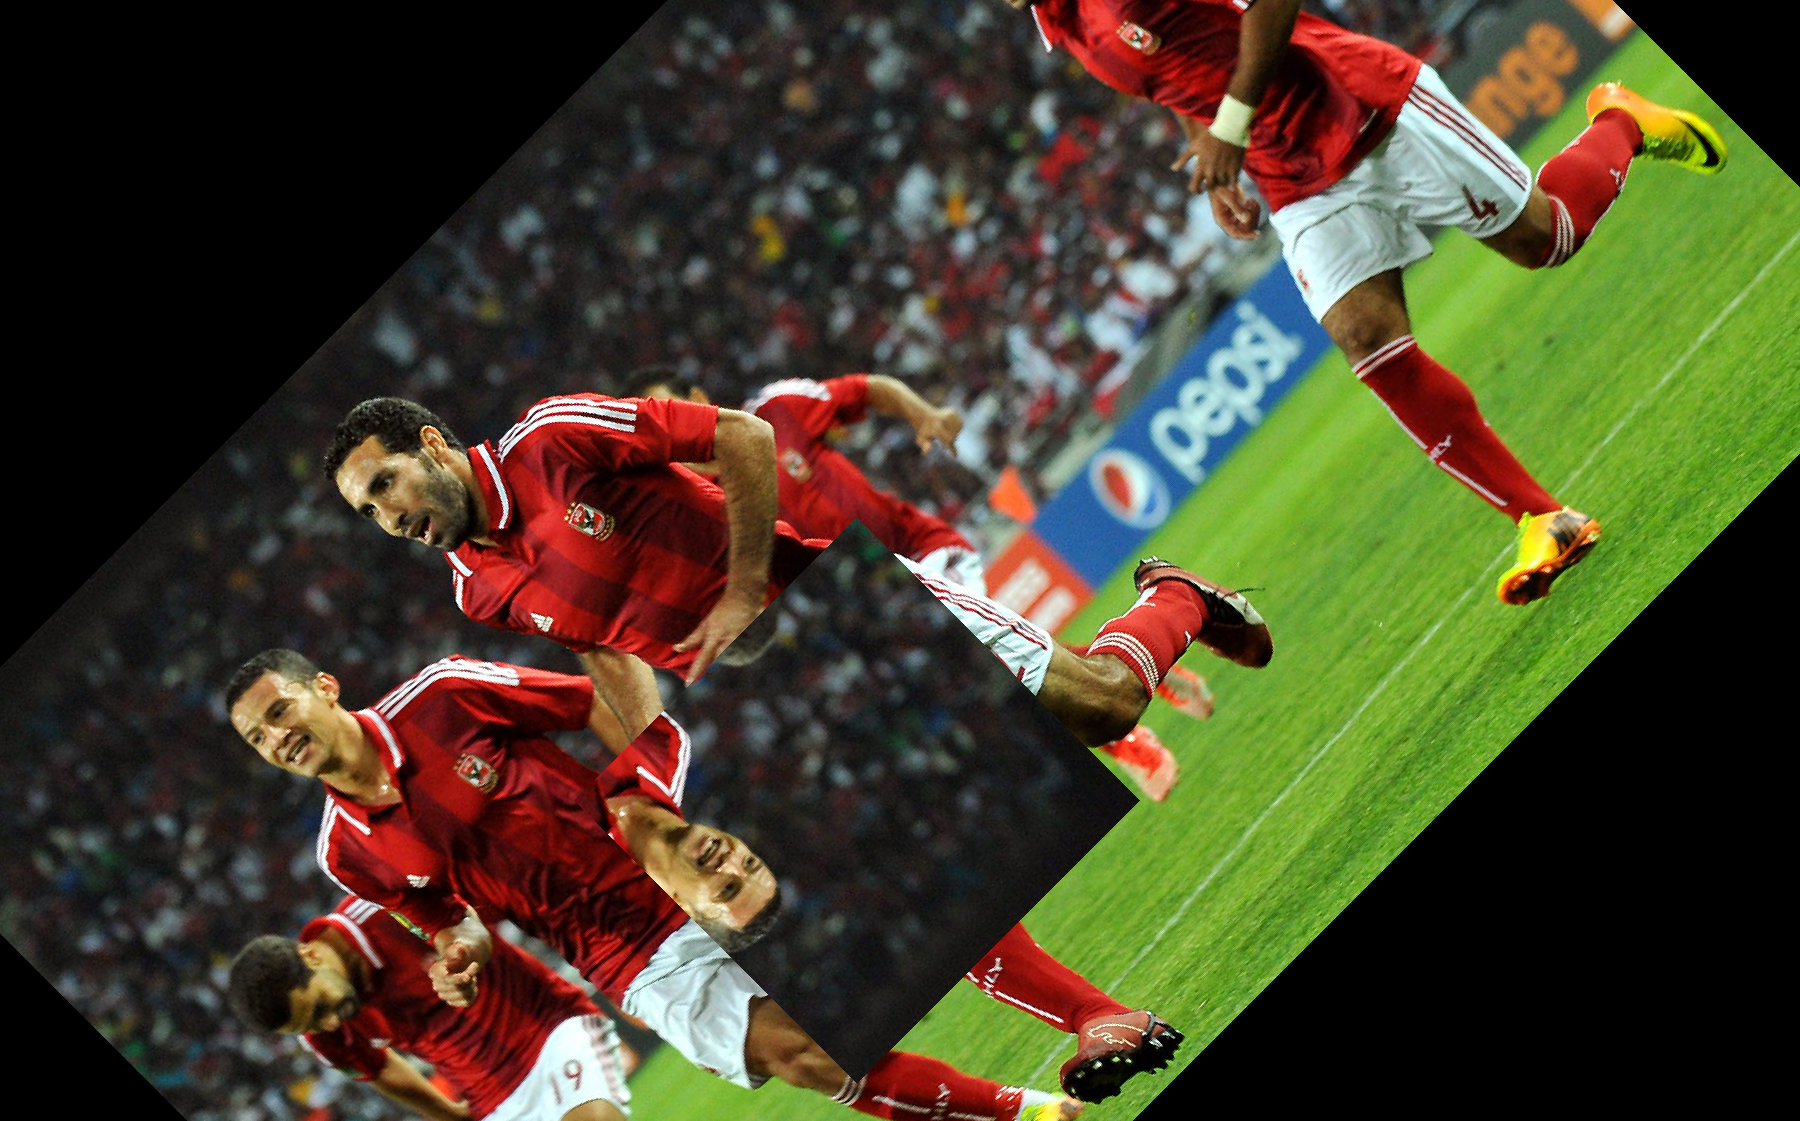

In [11]:
pil_im_2.rotate(45)

>* In the above, we implemented: `.crop()`, `.paste()`, `resize()`, `.rotate()` ... Note the `Image.Transpose.ROTATE_90` is used instead of flip not rotate.

>* Only `.thumbnail()` edits on the original image.

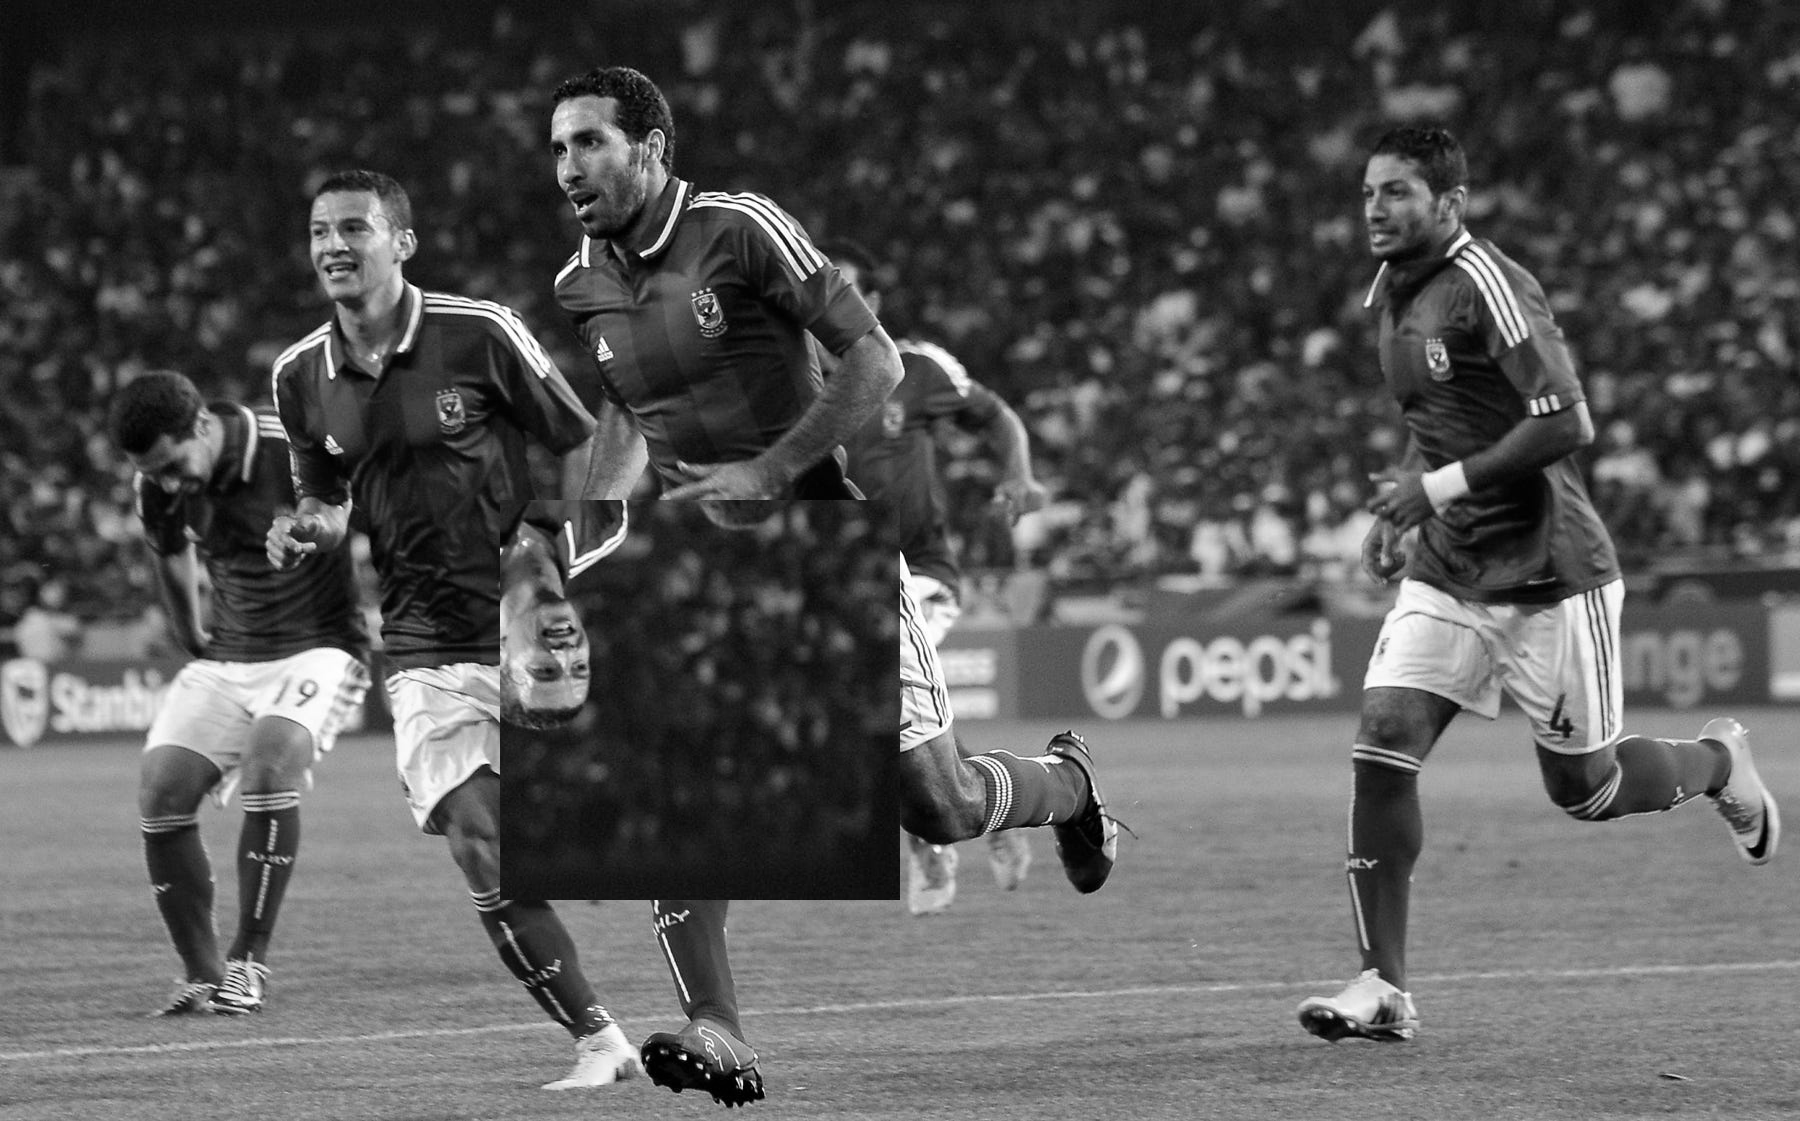

In [12]:
pil_im_2.convert('L')

____________________________________

In [13]:
import numpy as np

print( type(pil_im) , "---------\n",
      np.array(pil_im), "---------\n",
      np.array(pil_im.convert('L')), "---------\n",
      np.array(pil_im).shape, "---------\n",
      np.array(pil_im.convert('L')).shape, "---------"
     )

<class 'PIL.JpegImagePlugin.JpegImageFile'> ---------
 [[[ 14  13  11]
  [ 13  12  10]
  [ 12  11   9]
  ...
  [ 28  29  33]
  [ 28  27  32]
  [ 30  29  34]]

 [[ 22  21  19]
  [ 21  20  18]
  [ 20  19  17]
  ...
  [ 27  28  32]
  [ 27  26  31]
  [ 29  28  33]]

 [[ 18  17  15]
  [ 19  18  16]
  [ 18  17  15]
  ...
  [ 26  27  29]
  [ 26  26  28]
  [ 28  28  30]]

 ...

 [[125 177  50]
  [125 177  51]
  [122 174  50]
  ...
  [108 167  39]
  [107 166  38]
  [105 161  34]]

 [[131 183  57]
  [131 181  56]
  [128 178  55]
  ...
  [102 161  35]
  [ 96 155  29]
  [ 90 146  21]]

 [[128 178  53]
  [126 176  51]
  [122 172  47]
  ...
  [105 168  37]
  [100 163  32]
  [ 95 156  26]]] ---------
 [[ 13  12  11 ...  29  28  30]
 [ 21  20  19 ...  28  27  29]
 [ 17  18  17 ...  27  26  28]
 ...
 [147 147 144 ... 135 134 130]
 [153 152 149 ... 129 123 115]
 [149 147 143 ... 134 129 123]] ---------
 (1121, 1800, 3) ---------
 (1121, 1800) ---------


In [15]:
from PIL import Image

pil_im_gray = Image.open('Images\\second.jpg').convert("L")
pil_im_gray_as_array = np.array(pil_im_gray)

> In GrayScale [0 => 255] `0 means black` and `255 means white`

In [16]:
# Black image
Image.fromarray( np.zeros(pil_im_gray_as_array.shape) ).show()


In [17]:
# White image
Image.fromarray( 255* np.ones(pil_im_gray_as_array.shape) ).show()

In [18]:
# image transformations:

inverted = 255 - pil_im_gray_as_array

clamped_50_to_150 = 50 + 100*(pil_im_gray_as_array/255)

squared = 255 * (pil_im_gray_as_array/255)**2

# to understand those image_preprocessing, take array from [0 ... 255] and substitute with edge cases first.



Image.fromarray( clamped_50_to_150 ).show()

# Image.fromarray() takes the array and convert it to PIL image file to use .show() and display it


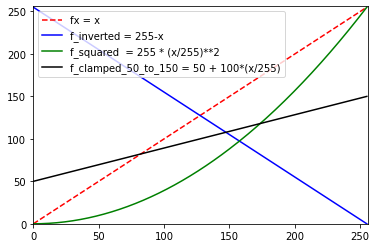

In [19]:
x = np.arange(0,256,1)

f_inverted = 255-x 
f_squared  = 255 * (x/255)**2
f_clamped_50_to_150 = 50 + 100*(x/255)

plt.plot(x, x, 'r--', label = 'fx = x')
plt.plot(x,f_inverted, 'b-',label = 'f_inverted = 255-x')
plt.plot(x,f_squared, 'g-',label = 'f_squared  = 255 * (x/255)**2')
plt.plot(x,f_clamped_50_to_150, 'k-', label = 'f_clamped_50_to_150 = 50 + 100*(x/255)')
plt.legend()
plt.xlim([0,256]);
plt.ylim([0,256]);

>* The first example inverts the graylevels of the image.
>* The second one clamps the intensities to the interval 50 px to 150 px.
>* The third applies a quadratic function, which **lowers the values of the darker pixels**.

Take a note:
* [**Histogram Equalization video1**](https://www.youtube.com/watch?v=kCvIO5E-Pc0)
* [**Histogram Equalization video2**](https://www.youtube.com/watch?v=WuVyG4pg9xQ)


### Coding `Histogram Equalization` according video1:
>* `Histogram Equalization` works **only on GrayScale Images** and those have one value instead of 3 for each pixel.
>* `Histogram Equalization` is used to correct the constaract of the images ... but sometimes it becomes bad.
>* Contrast Limited AHE (`CLAHE`) is a variant of adaptive histogram equalization that **limits contrast amplification to reduce noise amplification.**
>* Bluring image is another processing used to handle noise ... `avg_bluring`, `Median_BLuring`, `Gaussian_Bluring`, `BiLateral_Bluring` "the best of them often".[**Watch this**](https://www.youtube.com/watch?v=jCXApg0KDps)
________________

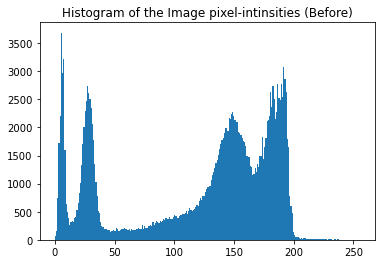

In [20]:
pil_im_gray_as_array = np.array( Image.open('Images\\histogram_equalization.jpg').convert(mode ='L') )
    
plt.hist(pil_im_gray_as_array.flatten(),bins =256)
plt.title("Histogram of the Image pixel-intinsities (Before)");

In [21]:
# calculating the histogram values to get pmf, cdf

count, bins_edges = np.histogram(pil_im_gray_as_array.flatten(),bins= 256)

count.shape , bins_edges.shape

((256,), (257,))

(256,)

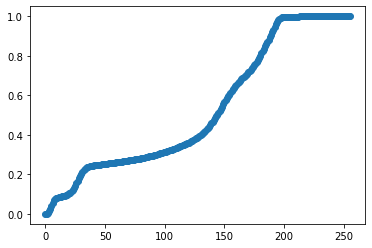

In [22]:
pmf = count / np.sum(count) 

cdf = pmf.cumsum()

mapped_cdf = 255 * cdf

plt.plot(cdf,'o');
mapped_cdf.shape


In [23]:
new_img_as_array = np.interp(pil_im_gray_as_array.flatten(), bins_edges[:-1], mapped_cdf) # params:(x,xp,fp)


# bins_edges [0,      1,       2,     ...  255]       --> 257 enteries 
# mapped_cdf [value0, value1, value3  ... value_254]  --> 256 enteries

# bins_edges[: -1] --> 265 enteries (0 --> 255) ... pixel values we want

new_img_as_array.reshape( pil_im_gray_as_array.shape  ).shape


(419, 505)

>* This **linear interpolation** maps **`xp => fp`** when given value from `xp`, it interpolates it with its corresponding value from fp ... thus (`xp` & `fp` are the same shape)
>* The input is taken from `x` ... and outputs the same dimension of `y`



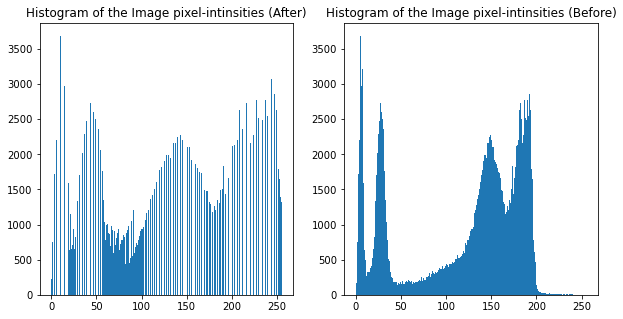

In [24]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(new_img_as_array,bins =256)
plt.title("Histogram of the Image pixel-intinsities (After)");

plt.subplot(122)
plt.hist(pil_im_gray_as_array.flatten(),bins =256)
plt.title("Histogram of the Image pixel-intinsities (Before)");


In [25]:
# after

new_shape = new_img_as_array.reshape( pil_im_gray_as_array.shape  ).shape

Image.fromarray( new_img_as_array.reshape(new_shape) ).show()

In [26]:
#before
Image.fromarray(pil_im_gray_as_array).show()

Comparison:
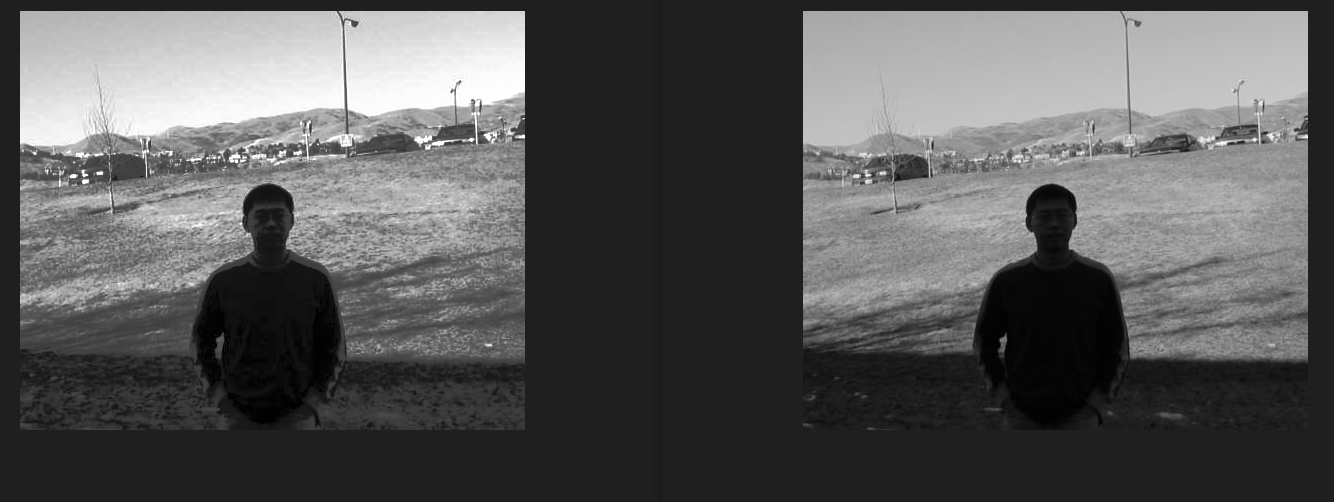

________________________

# Note:
* **`imtools`** used in the coding in the book is a technique followed by the author to make a file called **`imtools.py`** and add all functions you made to this file for further usage. 
______________________________

### PCA of Images: